<a href="https://colab.research.google.com/github/WaseemRaza844/Advance-Machine-Learning/blob/master/Home_Work_DR_waseem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
try:
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Note: using Google CoLab


Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


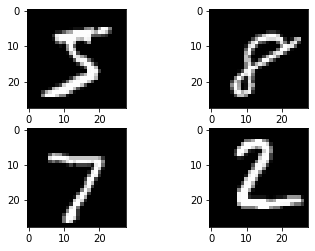

In [0]:
import keras
import numpy as np 
from  keras.datasets import mnist
import matplotlib.pyplot as plt
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[-1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_test[0], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_test[1], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

We can concatenate the train test splid data into a single file and still get the same images as shown below.

(70000, 28, 28)
(70000,)


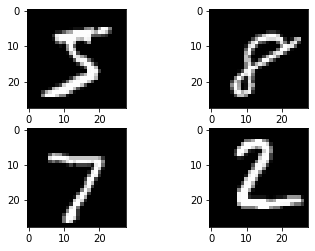

In [0]:
x_data=np.concatenate([x_train,x_test],axis=0)
y_data=np.concatenate([y_train,y_test],axis=0)
print(x_data.shape)
print(y_data.shape)
plt.subplot(221)
plt.imshow(x_data[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_data[59999], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_data[60000], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_data[60001], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [0]:
x_train = np.reshape(x_train,(60000,784))
x_test = np.reshape(x_test,(10000,784))
x_data = np.reshape(x_data,(70000,784))

x_train = x_train/255
x_test = x_test/255
x_data = x_data/255

print("Shape of Train Data: {}".format(x_train.shape))
print("Shape of test Data: {}".format(x_test.shape))
print("Shape of concatenated Data: {}".format(x_test.shape))
x_data

Shape of Train Data: (60000, 784)
Shape of test Data: (10000, 784)
Shape of concatenated Data: (10000, 784)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Data Visualization

## PCA

First we will use PCA to visualize the MNIST Dataset

Source: github.com/saradhix/mnist_visual/blob/master/pca.py


In [0]:
from six.moves import urllib
from sklearn.datasets import fetch_openml

from scipy.io import loadmat
mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
mnist_path = "./mnist-original.mat"
response = urllib.request.urlopen(mnist_alternative_url)
with open(mnist_path, "wb") as f:
    content = response.read()
    f.write(content)
mnist_raw = loadmat(mnist_path)
mnist = {
    "data": mnist_raw["data"].T,
    "target": mnist_raw["label"][0],
    "COL_NAMES": ["label", "data"],
    "DESCR": "mldata.org dataset: mnist-original",
}

Digit 1 appears  2560 times
Digit 7 appears  2440 times


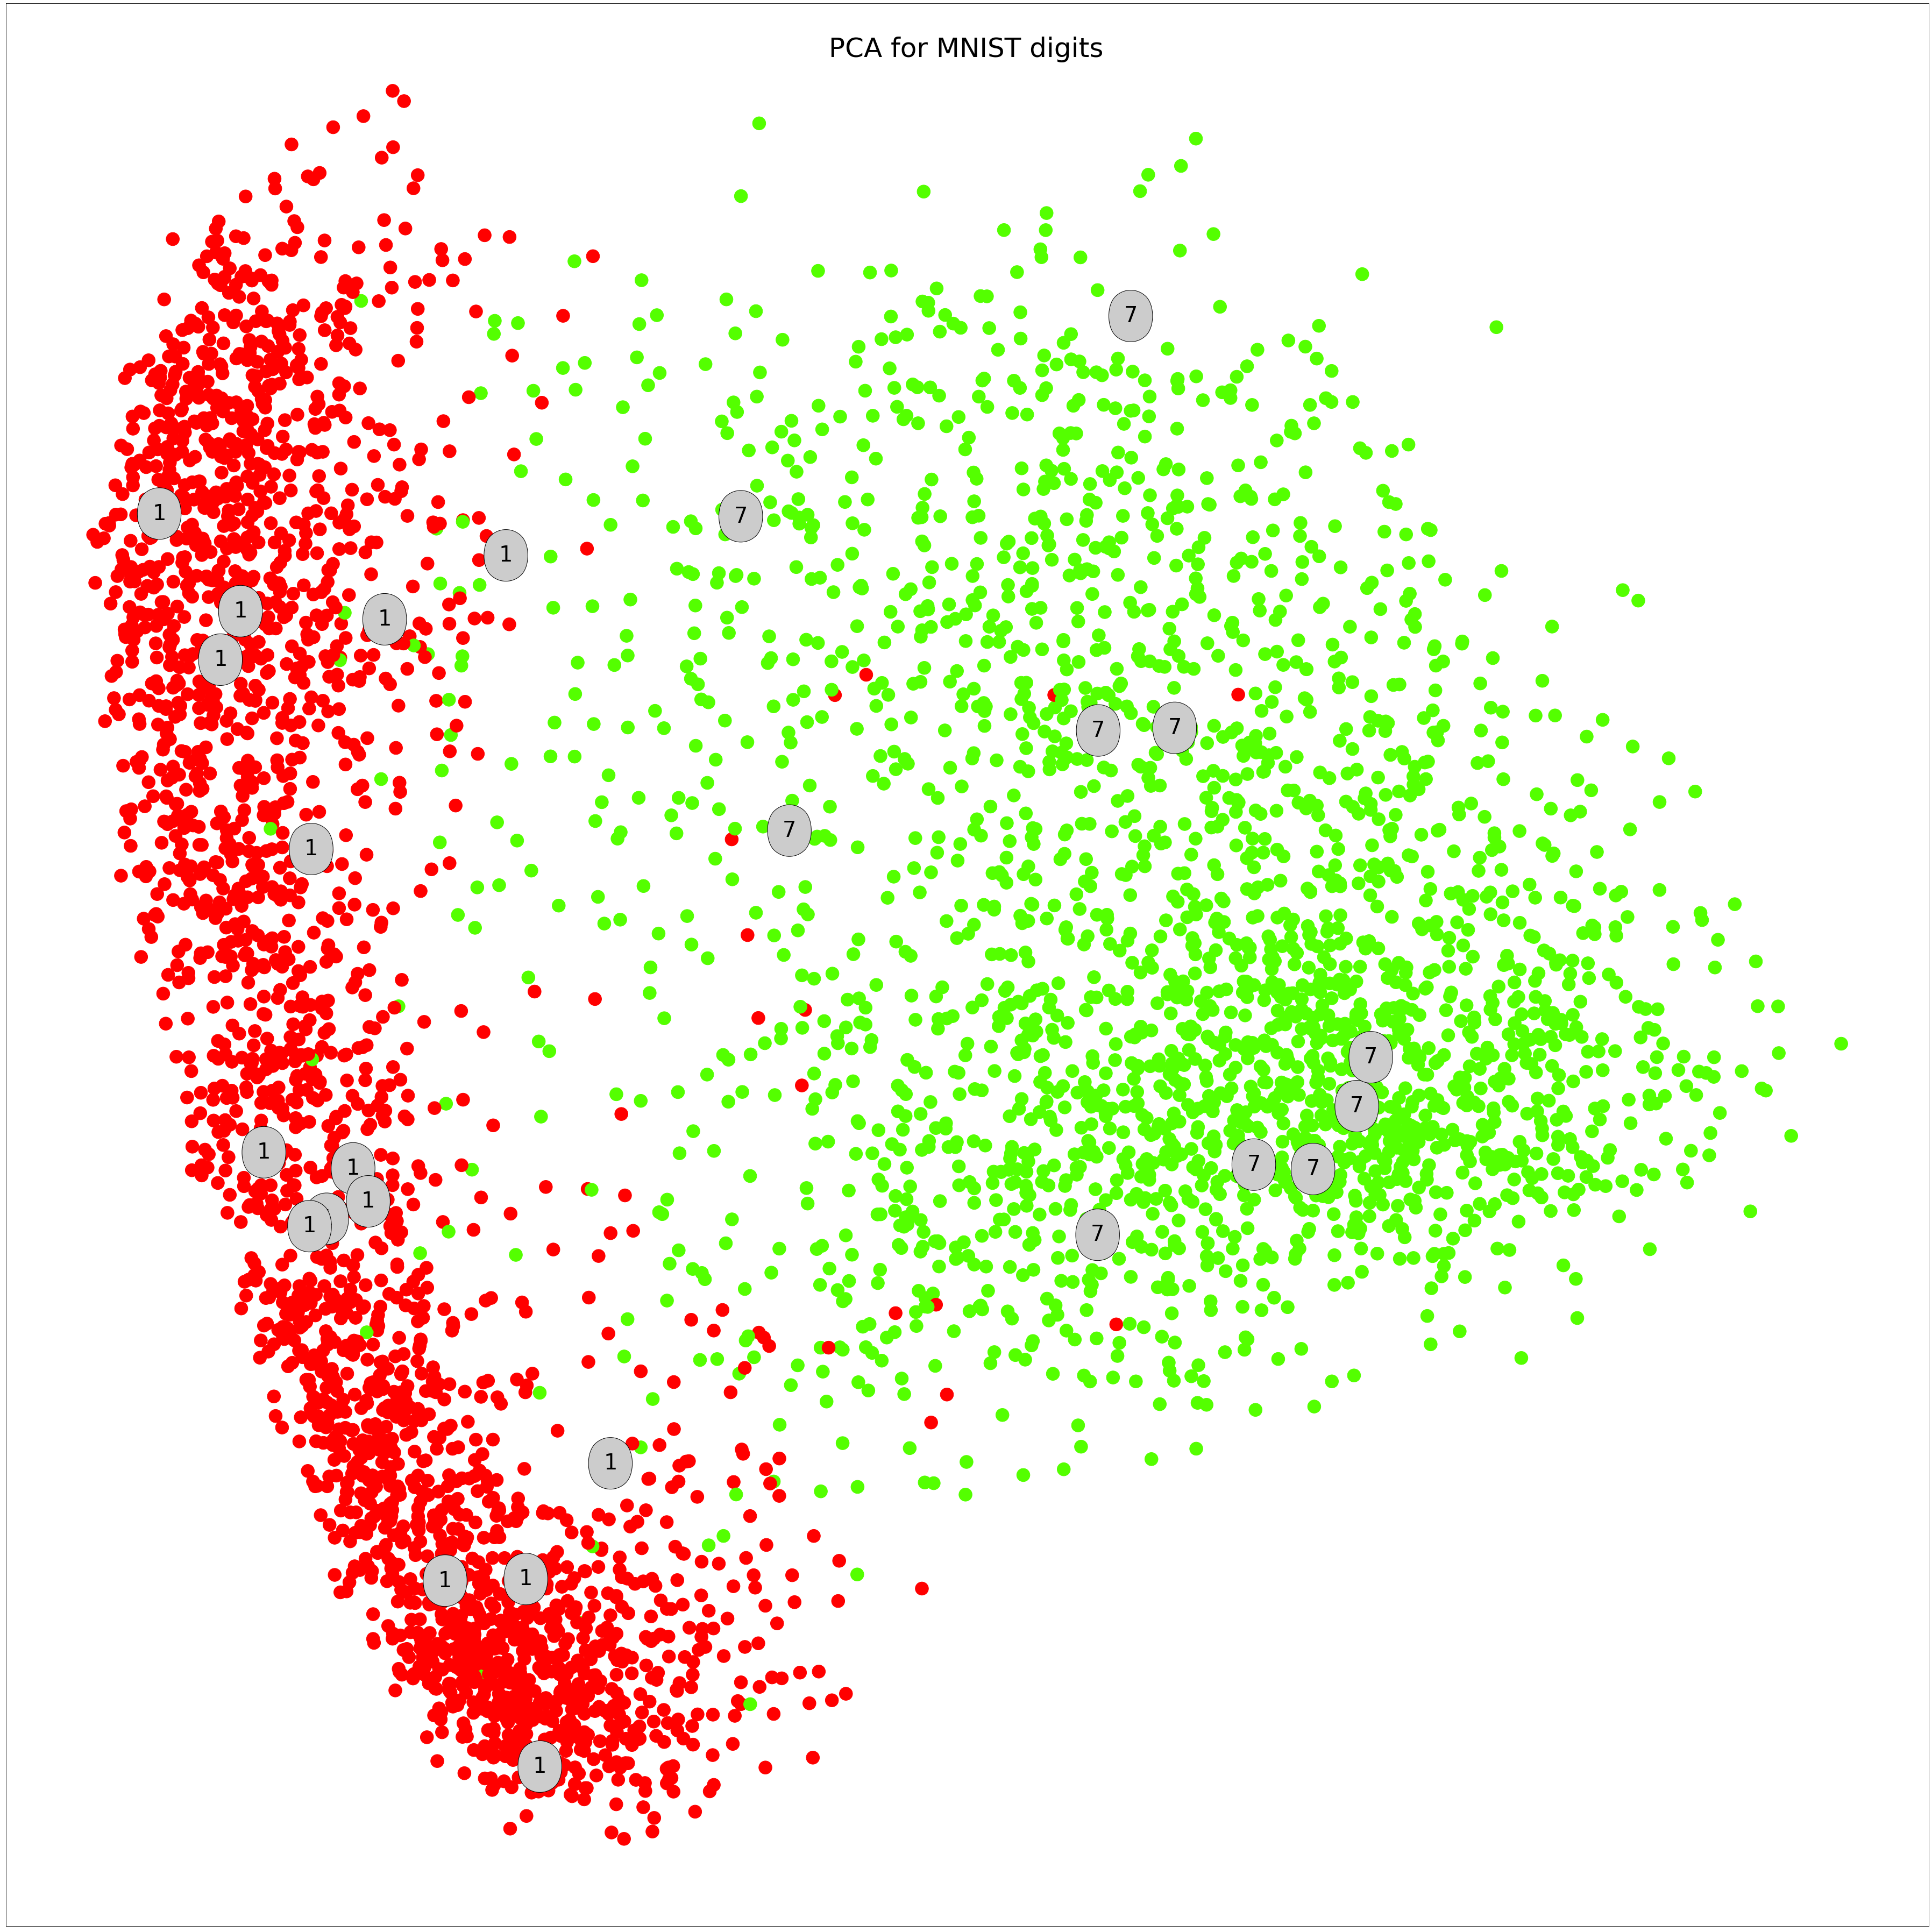

In [0]:
import numpy as np
import matplotlib.pyplot as plt  
from six.moves import urllib
from sklearn.datasets import fetch_openml
from sklearn.utils import shuffle
from sklearn.decomposition import PCA

# mytargets = list(range(0,10))
mytargets = [1,7]
XX_train, yy_train = mnist['data'] / 255., mnist['target']
X_train_vis=[]
y_train_vis=[]
for i, label in enumerate(yy_train):
  if label in mytargets:
    X_train_vis.append(XX_train[i])
    y_train_vis.append(yy_train[i])
num_samples_to_plot = 5000
X_train_vis, y_train_vis = shuffle(X_train_vis, y_train_vis)
X_train_vis, y_train_vis = X_train_vis[:num_samples_to_plot], y_train_vis[:num_samples_to_plot]  # lets subsample a bit for a first impression

for digit in mytargets:
  instances=[i for i in y_train_vis if i==digit]
  print("Digit",digit,"appears ",len(instances), "times")

pca = PCA(n_components=2)
fig, plot = plt.subplots()
fig.set_size_inches(50, 50)
plt.prism()

X_transformed = pca.fit_transform(X_train_vis)
plot.scatter(X_transformed[:, 0], X_transformed[:, 1],s=600,c=y_train_vis)
plot.set_xticks(())
plot.set_yticks(())

count=0;
plt.tight_layout()
plt.suptitle("PCA for MNIST digits",fontsize= 50)
for label , x, y in zip(y_train_vis, X_transformed[:, 0], X_transformed[:, 1]):
#Lets annotate every 1 out of 200 samples, otherwise graph will be cluttered with anotations
  if count % 200 == 0:
    plt.annotate(str(int(label)),xy=(x,y), color='black', weight='normal',size=40,bbox=dict(boxstyle="round4,pad=.8", fc="0.8"))
  count = count + 1
#plt.savefig("mnist_pca.png")
plt.show()

## Kernel PCA 

Digit 1 appears  2520 times
Digit 7 appears  2480 times


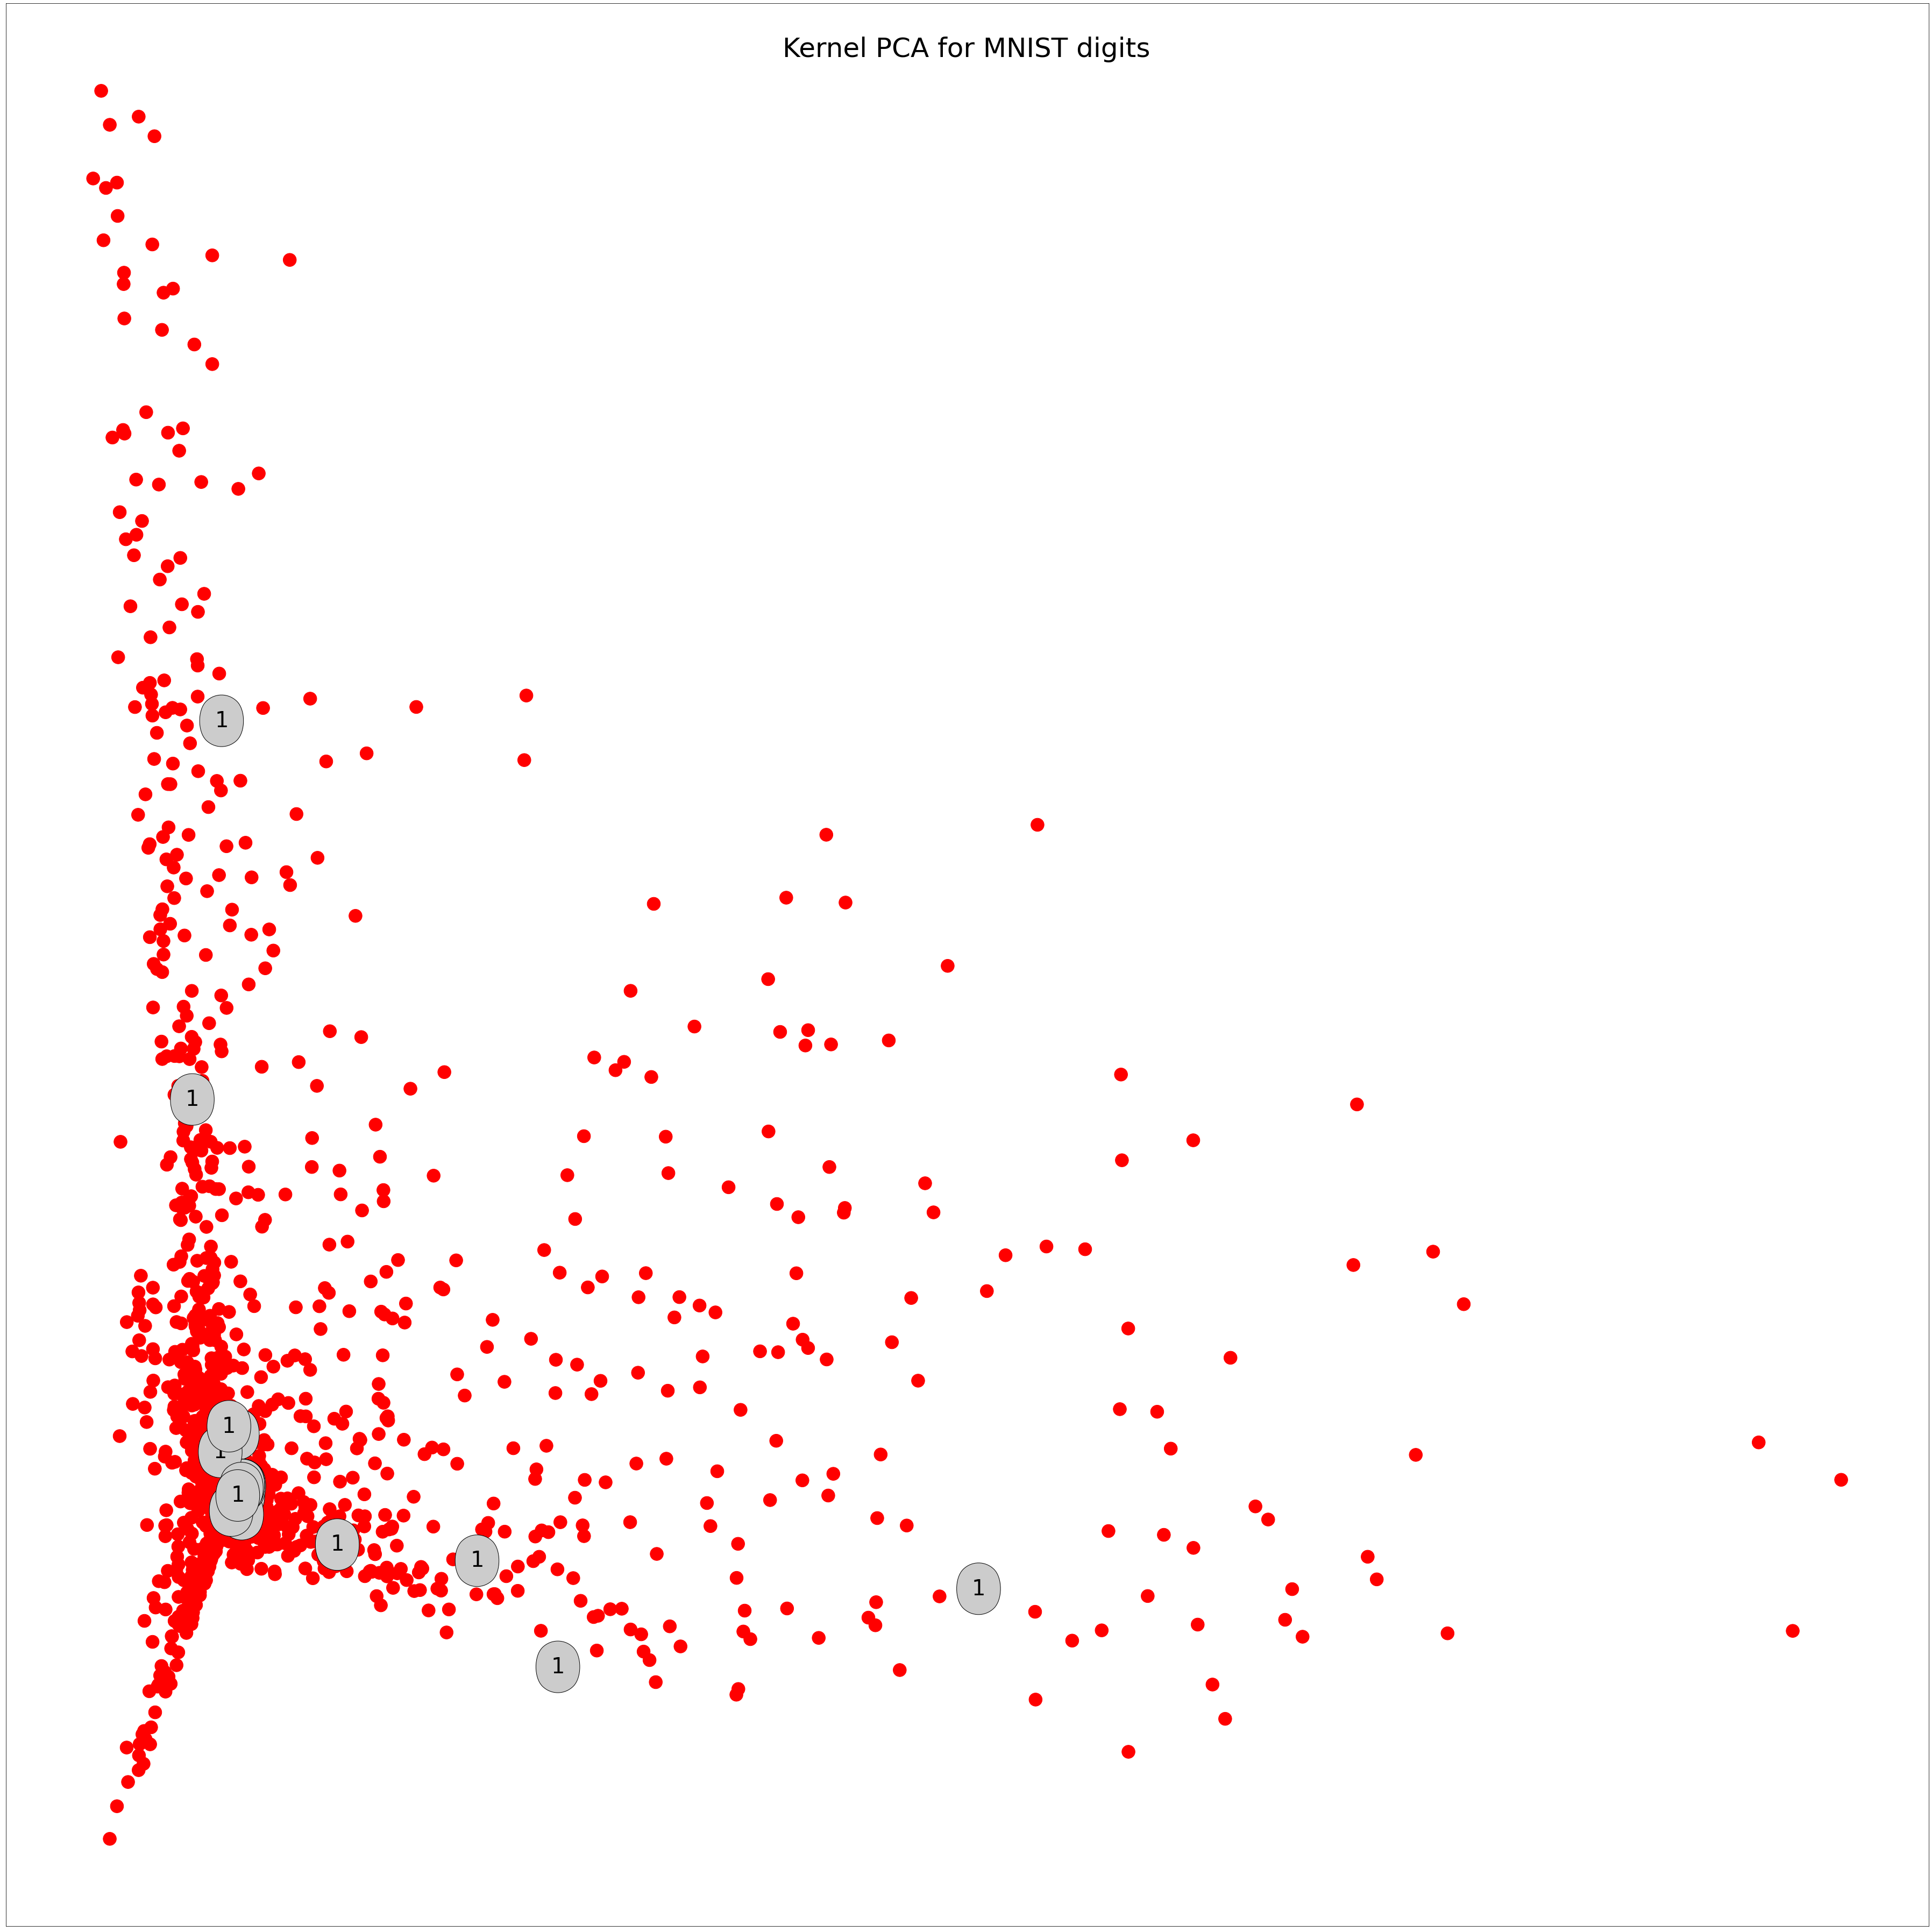

In [0]:
import numpy as np
import matplotlib.pyplot as plt  
from six.moves import urllib
from sklearn.datasets import fetch_openml
from sklearn.utils import shuffle
from sklearn.decomposition import PCA, KernelPCA

from scipy.io import loadmat
mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
mnist_path = "./mnist-original.mat"
response = urllib.request.urlopen(mnist_alternative_url)
with open(mnist_path, "wb") as f:
    content = response.read()
    f.write(content)
mnist_raw = loadmat(mnist_path)
mnist = {
    "data": mnist_raw["data"].T,
    "target": mnist_raw["label"][0],
    "COL_NAMES": ["label", "data"],
    "DESCR": "mldata.org dataset: mnist-original",
}

# mytargets = list(range(0,10))
mytargets = [1,7]
XX_train, yy_train = mnist['data'] / 255., mnist['target']
X_train_vis=[]
y_train_vis=[]
for i, label in enumerate(yy_train):
  if label in mytargets:
    X_train_vis.append(XX_train[i])
    y_train_vis.append(yy_train[i])
num_samples_to_plot = 5000
X_train_vis, y_train_vis = shuffle(X_train_vis, y_train_vis)
X_train_vis, y_train_vis = X_train_vis[:num_samples_to_plot], y_train_vis[:num_samples_to_plot]  # lets subsample a bit for a first impression

for digit in mytargets:
  instances=[i for i in y_train_vis if i==digit]
  print("Digit",digit,"appears ",len(instances), "times")

kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.5)
fig, plot = plt.subplots()
fig.set_size_inches(50, 50)
plt.prism()

X_transformed = kpca.fit_transform(X_train_vis)
plot.scatter(X_transformed[:, 0], X_transformed[:, 1],s=600,c=y_train_vis)
plot.set_xticks(())
plot.set_yticks(())

count=0;
plt.tight_layout()
plt.suptitle("Kernel PCA for MNIST digits",fontsize= 50)
for label , x, y in zip(y_train_vis, X_transformed[:, 0], X_transformed[:, 1]):
#Lets annotate every 1 out of 200 samples, otherwise graph will be cluttered with anotations
  if count % 200 == 0:
    plt.annotate(str(int(label)),xy=(x,y), color='black', weight='normal',size=40,bbox=dict(boxstyle="round4,pad=.8", fc="0.8"))
  count = count + 1
#plt.savefig("mnist_pca.png")
plt.show()

## LLE

In [0]:
import numpy as np
import matplotlib.pyplot as plt  
from six.moves import urllib
from sklearn.datasets import fetch_openml
from sklearn.utils import shuffle
from sklearn.manifold import LocallyLinearEmbedding

from scipy.io import loadmat
mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
mnist_path = "./mnist-original.mat"
response = urllib.request.urlopen(mnist_alternative_url)
with open(mnist_path, "wb") as f:
    content = response.read()
    f.write(content)
mnist_raw = loadmat(mnist_path)
mnist = {
    "data": mnist_raw["data"].T,
    "target": mnist_raw["label"][0],
    "COL_NAMES": ["label", "data"],
    "DESCR": "mldata.org dataset: mnist-original",
}

# mytargets = list(range(0,10))
mytargets = [4,9]
XX_train, yy_train = mnist['data'] / 255., mnist['target']
X_train_vis=[]
y_train_vis=[]
for i, label in enumerate(yy_train):
  if label in mytargets:
    X_train_vis.append(XX_train[i])
    y_train_vis.append(yy_train[i])
num_samples_to_plot = 5000
X_train_vis, y_train_vis = shuffle(X_train_vis, y_train_vis)
X_train_vis, y_train_vis = X_train_vis[:num_samples_to_plot], y_train_vis[:num_samples_to_plot]  # lets subsample a bit for a first impression

for digit in mytargets:
  instances=[i for i in y_train_vis if i==digit]
  print("Digit",digit,"appears ",len(instances), "times")


transformer = LocallyLinearEmbedding(n_neighbors = 10, n_components = 2,
                                     eigen_solver='auto', method='standard')
fig, plot = plt.subplots()
fig.set_size_inches(50, 50)
plt.prism()

X_transformed = transformer.fit_transform(X_train_vis)
plot.scatter(X_transformed[:, 0], X_transformed[:, 1],s=600, c=y_train_vis)
plot.set_xticks(())
plot.set_yticks(())

# kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.5)
# fig, plot = plt.subplots()
# fig.set_size_inches(50, 50)
# plt.prism()

# X_transformed = kpca.fit_transform(X_train_vis)
# plot.scatter(X_transformed[:, 0], X_transformed[:, 1],s=600,c=y_train_vis)
# plot.set_xticks(())
# plot.set_yticks(())

count=0;
plt.tight_layout()
plt.suptitle("Local Linear Embedding for MNIST digits",fontsize= 50)
for label , x, y in zip(y_train_vis, X_transformed[:, 0], X_transformed[:, 1]):
#Lets annotate every 1 out of 200 samples, otherwise graph will be cluttered with anotations
  if count % 200 == 0:
    plt.annotate(str(int(label)),xy=(x,y), color='black', weight='normal',size=40,bbox=dict(boxstyle="round4,pad=.8", fc="0.8"))
  count = count + 1
#plt.savefig("mnist_pca.png")
plt.show()

## Isomap


In [0]:
import numpy as np
import matplotlib.pyplot as plt  
from six.moves import urllib
from sklearn.datasets import fetch_openml
from sklearn.utils import shuffle
from sklearn.manifold import Isomap

from scipy.io import loadmat
mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
mnist_path = "./mnist-original.mat"
response = urllib.request.urlopen(mnist_alternative_url)
with open(mnist_path, "wb") as f:
    content = response.read()
    f.write(content)
mnist_raw = loadmat(mnist_path)
mnist = {
    "data": mnist_raw["data"].T,
    "target": mnist_raw["label"][0],
    "COL_NAMES": ["label", "data"],
    "DESCR": "mldata.org dataset: mnist-original",
}

mytargets = list(range(0,10))
# mytargets = [1,7]
XX_train, yy_train = mnist['data'] / 255., mnist['target']
X_train_vis=[]
y_train_vis=[]
for i, label in enumerate(yy_train):
  if label in mytargets:
    X_train_vis.append(XX_train[i])
    y_train_vis.append(yy_train[i])
num_samples_to_plot = 5000
X_train_vis, y_train_vis = shuffle(X_train_vis, y_train_vis)
X_train_vis, y_train_vis = X_train_vis[:num_samples_to_plot], y_train_vis[:num_samples_to_plot]  # lets subsample a bit for a first impression

for digit in mytargets:
  instances=[i for i in y_train_vis if i==digit]
  print("Digit",digit,"appears ",len(instances), "times")


transformer = Isomap(n_neighbors = 10, n_components = 2)
fig, plot = plt.subplots()
fig.set_size_inches(50, 50)
plt.prism()

X_transformed = transformer.fit_transform(X_train_vis)
plot.scatter(X_transformed[:, 0], X_transformed[:, 1],s=600, c=y_train_vis)
plot.set_xticks(())
plot.set_yticks(())

# kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.5)
# fig, plot = plt.subplots()
# fig.set_size_inches(50, 50)
# plt.prism()

# X_transformed = kpca.fit_transform(X_train_vis)
# plot.scatter(X_transformed[:, 0], X_transformed[:, 1],s=600,c=y_train_vis)
# plot.set_xticks(())
# plot.set_yticks(())

count=0;
plt.tight_layout()
plt.suptitle("Isometric mapping for MNIST digits",fontsize= 50)
for label , x, y in zip(y_train_vis, X_transformed[:, 0], X_transformed[:, 1]):
#Lets annotate every 1 out of 200 samples, otherwise graph will be cluttered with anotations
  if count % 200 == 0:
    plt.annotate(str(int(label)),xy=(x,y), color='black', weight='normal',size=40,bbox=dict(boxstyle="round4,pad=.8", fc="0.8"))
  count = count + 1
#plt.savefig("mnist_pca.png")
plt.show()

# Dimensionality Reduction

## Cross Validation Function

In [0]:
import tensorflow.keras
import requests
from sklearn import metrics
from keras import layers, optimizers, regularizers
from tensorflow.keras import regularizers
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def crossVal(X_tr,Y_tr,X_ts,Y_ts):
    model = Sequential()
    model.add(Dense(50, input_dim = X_tr.shape[1], activation = 'relu', activity_regularizer = regularizers.l2(1e-2)))
    model.add(Dropout(0.25))
    model.add(Dense(100, activation = 'relu', activity_regularizer = regularizers.l2(1e-2)))
    model.add(Dropout(0.25))        
    model.add(Dense(25, activation = 'relu', activity_regularizer = regularizers.l2(1e-2)))
    model.add(BatchNormalization(momentum=0.99, epsilon=0.001))
    model.add(Dense(Y_tr.shape[1],activation='softmax')) # categorical_crossentropy
      
      # Adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
      # model.compile(optimizer = Adam, loss = "categorical_crossentropy", metrics = ["categorical_accuracy"])
    model.compile(loss='categorical_crossentropy', optimizer='adam')    
      
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-6, patience=15, verbose=2, mode='auto', restore_best_weights=True)
    model.fit(X_tr,Y_tr,validation_data=(X_ts,Y_ts),callbacks=[monitor],verbose=2,epochs=100)
      
      # Predictions
    was_pred = model.predict(X_ts)
    was_pred = np.argmax(was_pred,axis=1)
    y_compare = np.argmax(Y_ts,axis=1) # For accuracy calculation    
    score = metrics.accuracy_score(y_compare, was_pred)
  
    return score

## Benchmark: Without Dimensionality Reduction 

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import keras 
from  keras.datasets import mnist
import numpy as NP

(x_train,y_train),(x_test,y_test) = mnist.load_data()
image_size = 784 # 28 x 28
x_train = x_train.reshape(x_train.shape[0], image_size) 
x_test = x_test.reshape(x_test.shape[0], image_size)
# x_train = np.reshape(x_train,(60000,784))
# x_test = np.reshape(x_test,(10000,784))
x_train = x_train/255
x_test = x_test/255

# Convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
score_gen=crossVal(x_train,y_train,x_test,y_test)
print(f"The accuracy of classification on MNIST dataset without dimensionlity reduction is: {score_gen}")


(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)
Epoch 1/100
1875/1875 - 6s - loss: 0.6379 - val_loss: 0.2787
Epoch 2/100
1875/1875 - 5s - loss: 0.3915 - val_loss: 0.2235
Epoch 3/100
1875/1875 - 6s - loss: 0.3593 - val_loss: 0.2432
Epoch 4/100
1875/1875 - 6s - loss: 0.3381 - val_loss: 0.2099
Epoch 5/100
1875/1875 - 5s - loss: 0.3271 - val_loss: 0.2178
Epoch 6/100
1875/1875 - 5s - loss: 0.3163 - val_loss: 0.2139
Epoch 7/100
1875/1875 - 5s - loss: 0.3091 - val_loss: 0.2096
Epoch 8/100
1875/1875 - 5s - loss: 0.3088 - val_loss: 0.2439
Epoch 9/100
1875/1875 - 5s - loss: 0.3094 - val_loss: 0.2022
Epoch 10/100
1875/1875 - 5s - loss: 0.3052 - val_loss: 0.2044
Epoch 11/100
1875/1875 - 5s - loss: 0.2985 - val_loss: 0.2192
Epoch 12/100
1875/1875 - 5s - loss: 0.2974 - val_loss: 0.2204
Epoch 13/100
1875/1875 - 5s - loss: 0.3021 - val_loss: 0.2110
Epoch 14/100
1875/1875 - 5s - loss: 0.3034 - val_loss: 0.2170
Epoch 15/100
1875/1875 - 5s - loss: 0.2997 - val_loss: 0.2034
Epoch 16/100
1875/1875 - 5s -

##PCA for Dimensionality Reduction

In [0]:
from sklearn.decomposition import PCA, KernelPCA
n_comp=7
pca = PCA(n_comp)
x_pca = pca.fit_transform(x_train)
approx_x = pca.inverse_transform(x_pca)
y_pca = pca.fit_transform(y_train)
approx_y = pca.inverse_transform(y_pca)

print(x_train.shape)
print(y_train.shape)


print(x_pca.shape)
print(y_pca.shape)


print(approx_x.shape)
print(approx_y.shape)
print(x_test.shape)
print(y_test.shape)

score_pca=crossVal(approx_x,approx_y,x_test,y_test)
print(f"The accuracy of classification on MNIST dataset for dimensionality reduction with PCA is: {score_pca}")
#plt.plot(range(n_comp), pca.explained_variance_ratio_)
#plt.plot(range(n_comp), np.cumsum(pca.explained_variance_ratio_))
#plt.title("Component-wise and Cumulative Explained Variance")


(60000, 784)
(60000, 10)
(60000, 7)
(60000, 7)
(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)
Epoch 1/100
1875/1875 - 6s - loss: 1.0157 - val_loss: 1.0654
Epoch 2/100
1875/1875 - 5s - loss: 0.4214 - val_loss: 1.1006
Epoch 3/100
1875/1875 - 5s - loss: -9.1314e-02 - val_loss: 1.3239
Epoch 4/100
1875/1875 - 5s - loss: -6.4740e-01 - val_loss: 1.3728
Epoch 5/100
1875/1875 - 5s - loss: -1.1621e+00 - val_loss: 1.6632
Epoch 6/100
1875/1875 - 6s - loss: -1.7829e+00 - val_loss: 1.7870
Epoch 7/100
1875/1875 - 6s - loss: -2.5528e+00 - val_loss: 2.2582
Epoch 8/100
1875/1875 - 6s - loss: -3.1232e+00 - val_loss: 2.4984
Epoch 9/100
1875/1875 - 5s - loss: -4.0688e+00 - val_loss: 2.4469
Epoch 10/100
1875/1875 - 5s - loss: -4.8913e+00 - val_loss: 3.1229
Epoch 11/100
1875/1875 - 5s - loss: -5.7366e+00 - val_loss: 4.1529
Epoch 12/100
1875/1875 - 5s - loss: -6.7342e+00 - val_loss: 4.2077
Epoch 13/100
1875/1875 - 5s - loss: -7.9529e+00 - val_loss: 5.4691
Epoch 14/100
1875/1875 - 5s - loss: -9.4452e+00 - v

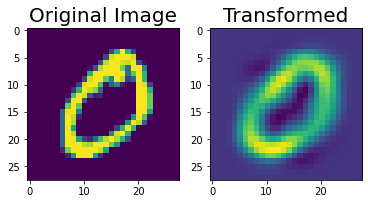

In [0]:
#plt.figure(figsize=(8,4));

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(x_train[1].reshape(28,28))
#plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

# 154 principal components
plt.subplot(1, 2, 2);
plt.imshow(approx_x[1].reshape(28, 28))
#plt.xlabel('154 components', fontsize = 14)
plt.title('Transformed', fontsize = 20);

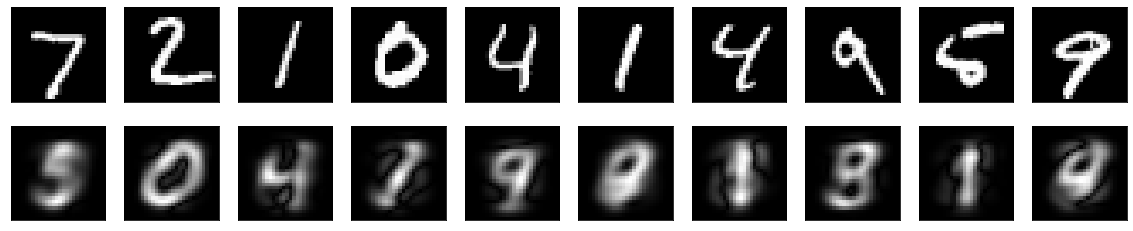

In [0]:
import matplotlib.pyplot as plt
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(np.abs(approx_x[i]).reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

##Kernal PCA for Dimensionality Reduction

In [0]:
!pip install -q --upgrade ipython

     |████████████████████████████████| 788kB 4.6MB/s 
     |████████████████████████████████| 358kB 23.8MB/s 
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.5 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.13.0 which is incompatible.


In [0]:
#from sklearn.decomposition import PCA, KernelPCA
#n_comp=7
#kpca = KernelPCA(n_components=n_comp, kernel='rbf', gamma=3)
#x_pca = kpca.fit_transform(x_train)
#approx_x = kpca.inverse_transform(x_pca)
#y_pca = kpca.fit_transform(y_train)
#approx_y = kpca.inverse_transform(y_pca)

print(x_train.shape)
print(y_train.shape)

print(x_pca.shape)
print(y_pca.shape)


print(approx_x.shape)
print(approx_y.shape)
print(x_test.shape)
print(y_test.shape)

#score_kpca=crossVal(approx_x,approx_y,x_test,y_test)
#print(f"The accuracy of classification on MNIST dataset for dimensionality reduction with KPCA is: {score_kpca}")
#plt.plot(range(n_comp), pca.explained_variance_ratio_)
#plt.plot(range(n_comp), np.cumsum(pca.explained_variance_ratio_))
#plt.title("Component-wise and Cumulative Explained Variance")

In [0]:
from sklearn.decomposition import kernel_pca
import matplotlib.pyplot as plt
import numpy as np
n_comp=10
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(x_train)
X_back = kpca.inverse_transform(X_kpca)

plt.plot(range(n_comp), kpca.explained_variance_ratio_)
plt.plot(range(n_comp), np.cumsum(kpca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")

## Autoencoder for Dimensionality Reduction

In [7]:
import keras 
from  keras.datasets import mnist
import numpy as np
(x_train,y_train),(x_test,y_test) = mnist.load_data()

x_train = np.reshape(x_train,(60000,784))
x_test = np.reshape(x_test,(10000,784))
x_train = x_train/255
x_test = x_test/255

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

print("Shape of Train Data: {}".format(x_train.shape))
print("Shape of Test Data: {}".format(x_test.shape))

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)
Shape of Train Data: (60000, 784)
Shape of Test Data: (10000, 784)


In [0]:
encoding_dim = 32  
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
input_img = Input(shape=(784,))

encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)


autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

In [10]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train,x_train,epochs=50,batch_size=128,shuffle=True,validation_data=(x_test,x_test))

Epoch 1/50
469/469 [==============================] - 2s 4ms/step - loss: 0.2008 - val_loss: 0.1430
Epoch 2/50
469/469 [==============================] - 2s 3ms/step - loss: 0.1329 - val_loss: 0.1225
Epoch 3/50
469/469 [==============================] - 2s 3ms/step - loss: 0.1195 - val_loss: 0.1132
Epoch 4/50
469/469 [==============================] - 2s 3ms/step - loss: 0.1122 - val_loss: 0.1084
Epoch 5/50
469/469 [==============================] - 2s 3ms/step - loss: 0.1074 - val_loss: 0.1040
Epoch 6/50
469/469 [==============================] - 2s 3ms/step - loss: 0.1035 - val_loss: 0.1007
Epoch 7/50
469/469 [==============================] - 2s 3ms/step - loss: 0.1009 - val_loss: 0.0987
Epoch 8/50
469/469 [==============================] - 2s 3ms/step - loss: 0.0988 - val_loss: 0.0966
Epoch 9/50
469/469 [==============================] - 2s 3ms/step - loss: 0.0972 - val_loss: 0.0953
Epoch 10/50
469/469 [==============================] - 2s 3ms/step - loss: 0.0958 - val_loss: 0.0939

In [12]:
encoded_imgs = autoencoder.predict(x_train)
encoded_imgs.shape

(60000, 784)

### Now we find the accuracy of our auto-encoder by passing its output to crossVal function. 

In [15]:
print(x_train.shape)
print(y_train.shape)

print(encoded_imgs.shape)
print(encoded_imgs.shape)


score_autoencoder=crossVal(encoded_imgs,y_train,x_test,y_test)
print(f"The accuracy of classification on MNIST dataset for dimensionality reduction with auto-encoder is: {score_autoencoder}")


(60000, 784)
(60000, 10)
(60000, 784)
(60000, 784)
Epoch 1/100
1875/1875 - 6s - loss: 0.5888 - val_loss: 0.3487
Epoch 2/100
1875/1875 - 5s - loss: 0.3871 - val_loss: 0.2521
Epoch 3/100
1875/1875 - 5s - loss: 0.3561 - val_loss: 0.2503
Epoch 4/100
1875/1875 - 5s - loss: 0.3380 - val_loss: 0.2310
Epoch 5/100
1875/1875 - 5s - loss: 0.3376 - val_loss: 0.2432
Epoch 6/100
1875/1875 - 5s - loss: 0.3242 - val_loss: 0.2316
Epoch 7/100
1875/1875 - 5s - loss: 0.3248 - val_loss: 0.2237
Epoch 8/100
1875/1875 - 5s - loss: 0.3179 - val_loss: 0.2501
Epoch 9/100
1875/1875 - 5s - loss: 0.3173 - val_loss: 0.2372
Epoch 10/100
1875/1875 - 5s - loss: 0.3148 - val_loss: 0.2389
Epoch 11/100
1875/1875 - 5s - loss: 0.3157 - val_loss: 0.2450
Epoch 12/100
1875/1875 - 5s - loss: 0.3101 - val_loss: 0.2381
Epoch 13/100
1875/1875 - 5s - loss: 0.3174 - val_loss: 0.2369
Epoch 14/100
1875/1875 - 5s - loss: 0.3116 - val_loss: 0.2463
Epoch 15/100
1875/1875 - 5s - loss: 0.3111 - val_loss: 0.2412
Epoch 16/100
1875/1875 - 5s 

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import keras 
from  keras.datasets import mnist
import numpy as NP
(x_train,y_train),(x_test,y_test) = mnist.load_data()
image_size = 784 # 28 x 28
x_train = x_train.reshape(x_train.shape[0], image_size) 
x_test = x_test.reshape(x_test.shape[0], image_size)
# x_train = np.reshape(x_train,(60000,784))
# x_test = np.reshape(x_test,(10000,784))
x_train = x_train/255
x_test = x_test/255

# Convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
score_gen=crossVal(encoded_imgs,y_train,x_test,y_test)
print(f"The accuracy of classification on MNIST dataset without dimensionlity reduction is: {score_gen}")


(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)
Epoch 1/100
1875/1875 - 6s - loss: 0.6117 - val_loss: 0.2648
Epoch 2/100
1875/1875 - 5s - loss: 0.3881 - val_loss: 0.2486
Epoch 3/100
1875/1875 - 5s - loss: 0.3477 - val_loss: 0.2225
Epoch 4/100
1875/1875 - 5s - loss: 0.3375 - val_loss: 0.2197
Epoch 5/100
1875/1875 - 5s - loss: 0.3305 - val_loss: 0.2129
Epoch 6/100
1875/1875 - 5s - loss: 0.3246 - val_loss: 0.2329
Epoch 7/100
1875/1875 - 5s - loss: 0.3194 - val_loss: 0.2087
Epoch 8/100
1875/1875 - 5s - loss: 0.3164 - val_loss: 0.2168
Epoch 9/100
1875/1875 - 5s - loss: 0.3151 - val_loss: 0.2153
Epoch 10/100
1875/1875 - 5s - loss: 0.3144 - val_loss: 0.2112
Epoch 11/100
1875/1875 - 5s - loss: 0.3159 - val_loss: 0.2200
Epoch 12/100
1875/1875 - 5s - loss: 0.3109 - val_loss: 0.2021
Epoch 13/100
1875/1875 - 6s - loss: 0.3146 - val_loss: 0.2161
Epoch 14/100
1875/1875 - 6s - loss: 0.3121 - val_loss: 0.2173
Epoch 15/100
1875/1875 - 5s - loss: 0.3122 - val_loss: 0.2108
Epoch 16/100
1875/1875 - 5s -

TEST DATA AS INPUT:


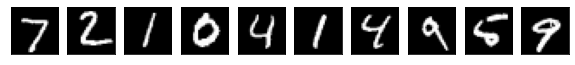

Reconstructed Image:


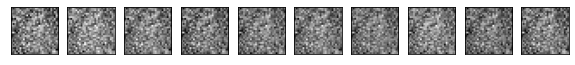

In [0]:
encoded_imgs = autoencoder.predict(x_test)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
print("TEST DATA AS INPUT:")
plt.figure(figsize=(10, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
print("Reconstructed Image:")

plt.figure(figsize=(10, 4))
for i in range(n):
    # display original
    
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

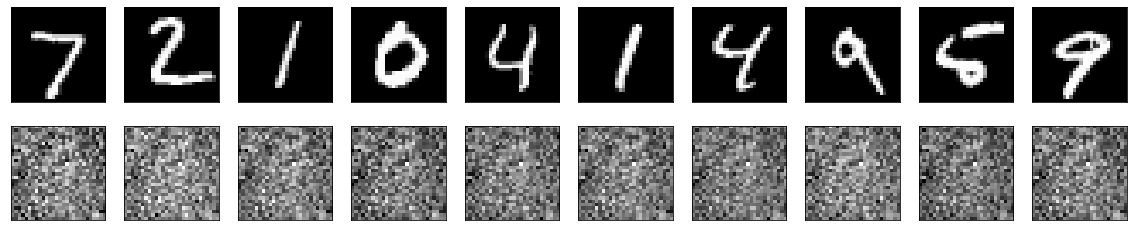

In [0]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
score_abalone = metrics.mean_squared_error(y_test, pred_abalone)

NameError: ignored

In [0]:
encoding_dim = 32  
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
input_img = Input(shape=(784,))


encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)


autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

In [0]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train,x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test,x_test))

In [0]:
import matplotlib.pyplot as plt
encoded_imgs = autoencoder.predict(x_test)
n = 10  # how many digits we will display
print("TEST DATA AS INPUT:")
plt.figure(figsize=(10, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
print("Reconstructed Image:")

plt.figure(figsize=(10, 4))
for i in range(n):
    # display original
    
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()